In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter

# Wordle Exercise

Wordle is a famous word game developed by Josh Wardle. 

Players have six guesses to find a five-letter word. After each guess the player will be shown a colour-coded version of their word.

If each letter in the word is:

- in the word and in the right place (shown as green) 🟩
- in the word and in the wrong place (shown as yellow) 🟨
- not in the word (shown as white) ⬜️

Example:

- 1st Guess : CRANE >> ⬜️🟩🟩🟨⬜️
- 2nd Guess : SOLID >> ⬜️⬜️⬜️🟩⬜️
- 3rd Guess: TRAIN >> ⬜️🟩🟩🟩🟩
- 4th Guess: BRAIN >> 🟩🟩🟩🟩🟩

Then player wins the game!

Your tasks are listed below:

### 1. Comparing Guess and Answer

***TASK:*** 

Before we try to play the game, we want to first define a function that can compare a guess and the true answer and return the result.
Define a function named `get_result(guess, answer)` and the output should be a list of 5 emojis.

For example: `get_result('SOLID', 'MOLDY')` gives you ⬜🟩🟩⬜🟨, when put in a list, it would be `["\U00002B1C", "\U0001F7E9", "\U0001F7E9", "\U00002B1C", "\U0001F7E8"]`


In [2]:
#Emojis for the game
guess_result = ["\U00002B1C", "\U0001F7E9", "\U0001F7E9", "\U00002B1C", "\U0001F7E8"]
for emoji in guess_result:
    print(emoji, end="")
    

⬜🟩🟩⬜🟨

In [3]:
def get_result(guess, answer): 
    result = []
    for i in range(len(guess)):
        if guess[i] == answer[i]:
            result.append("\U0001F7E9") #Green
        elif guess[i] in answer:
            result.append("\U0001F7E8") #Yellow
        else:
            result.append("\U00002B1C") #White
    return result
get_result('SOLID', 'MOLDY')


['⬜', '🟩', '🟩', '⬜', '🟨']

In [4]:
"".join(get_result('SOLID', 'MOLDY'))

'⬜🟩🟩⬜🟨'

In [5]:
"".join(get_result('SPINE', 'STEAK'))

'🟩⬜⬜⬜🟨'

### 2. Scrape list of Wordle words

***TASK:*** 

Get all words from the website ('https://www.wordunscrambler.net/word-list/wordle-word-list') and store them in a list.

In [2]:
x = requests.get('https://www.wordunscrambler.net/word-list/wordle-word-list').text
soup = BeautifulSoup(x, 'html.parser')

In [3]:
words = [i.text.strip() for i in soup.find_all(class_='invert light')]

In [4]:
len(words)

2309

In [5]:
words[:5]

['aback', 'abase', 'abate', 'abbey', 'abbot']

### 3. Choosing our first guess

***TASK:*** 

In this part, we want to find the best first guess. We can first find the frequency of each character at each position. For example, 'a' appeared in the first letter 100 times, in the second letter 252 times, and so on. 

Then, for each valid word, we can calculate the word's score by using the frequencies of the character at the position. For example, the score of word `THING` can be represented by `number of valid words starts with T + number of valid words with H as 2nd letter + number of valid words with I as 3rd letter + number of valid words with N as 4th letter + number of valid words with G as 5th letter`.

Finally, store all valid words and its scores in a DataFrame and find the word with the highest score.

In [6]:
words_split=[]
for word in words: 
    words_split.append(list(word)) #A, P, P, L, E

In [7]:
df=pd.DataFrame(words_split)
df.columns = ['Letter1', 'Letter2', 'Letter3', 'Letter4', 'Letter5']

In [8]:
df['Word'] = words
df

,Letter1,Letter2,Letter3,Letter4,Letter5,Word
0,a,b,a,c,k,aback
1,a,b,a,s,e,abase
2,a,b,a,t,e,abate
3,a,b,b,e,y,abbey
4,a,b,b,o,t,abbot
...,...,...,...,...,...,...
2304,y,o,u,n,g,young
2305,y,o,u,t,h,youth
2306,z,e,b,r,a,zebra
2307,z,e,s,t,y,zesty


In [9]:
#f1 = Counter(df.Letter1) ---> {'z':3, 'y':35 ...}
#f2 = Counter(df.Letter2)
#f3 = Counter(df.Letter3)
#f4 = Counter(df.Letter4)
#f5 = Counter(df.Letter5)

for i in range(5):
    exec(f'f{i+1} = Counter(df.Letter{i+1})')


In [10]:
word_scores=[]

#for word in words: #apple --> f1['a']+f2['p']+f3['p']+f4['l']+f5['e']
#    score=f1[word[0]]+f2[word[1]]+f3[word[2]]+f4[word[3]]+f5[word[4]]
#    word_scores.append([word, score])

for word in words:
    score=0
    for i in range(5):
        score+= eval(f'f{i+1}[word[{i}]]')
    word_scores.append([word, score])


        

In [11]:
scoredf = pd.DataFrame(word_scores)
scoredf.columns = ['Word', 'Score']
scoredf.sort_values(by='Score', ascending=False).head(10)

,Word,Score
1773,slate,1432
1644,sauce,1406
1778,slice,1403
1700,shale,1399
1647,saute,1395
1837,sooty,1390
1707,share,1387
1722,shine,1379
1958,suite,1377
457,crane,1375


### 4. Our next guess


***TASK:***

Assume we chose the word with highest score to start the game, and the result is 🟨🟨⬜️⬜️🟨. Find out our next best guess based on the score calculated.

Using the word `SLATE` gives us 🟨🟨⬜️⬜️🟨, that means `S`, `L`, `E`, are within the answer while `A` and `T` are not.

In [14]:
#filter out words that contains A or T

filtered_df = df[~df.apply(lambda row: row.isin(['a', 't']).any(), axis=1)]
filtered_df

'''
def contains_a_t(row):
    return 'a' in row.values or 't' in row.values

filtered_df = df[~df.apply(contains_a_t, axis=1)]
filtered_df
'''

,Letter1,Letter2,Letter3,Letter4,Letter5,Word
168,b,e,e,c,h,beech
169,b,e,e,f,y,beefy
174,b,e,g,i,n,begin
175,b,e,g,u,n,begun
176,b,e,i,n,g,being
...,...,...,...,...,...,...
2296,w,r,o,n,g,wrong
2298,w,r,u,n,g,wrung
2299,w,r,y,l,y,wryly
2303,y,i,e,l,d,yield


In [26]:
#filter out words where S is the first letter, or L is the second letter, or E is the last letter.
filtered_df=filtered_df.query('Letter1!="s" and Letter2!="l" and Letter5!="e"')
filtered_df

,Letter1,Letter2,Letter3,Letter4,Letter5,Word
168,b,e,e,c,h,beech
169,b,e,e,f,y,beefy
174,b,e,g,i,n,begin
175,b,e,g,u,n,begun
176,b,e,i,n,g,being
...,...,...,...,...,...,...
2296,w,r,o,n,g,wrong
2298,w,r,u,n,g,wrung
2299,w,r,y,l,y,wryly
2303,y,i,e,l,d,yield


In [53]:
#find words that contains S and L and E at the same time
filtered_df=filtered_df[filtered_df.apply(lambda row: all(char in row.values for char in ['s', 'l', 'e']), axis=1)]
filtered_df

,Letter1,Letter2,Letter3,Letter4,Letter5,Word
1153,l,o,s,e,r,loser
2238,w,e,l,s,h,welsh


In [54]:
scoredf.merge(filtered_df)

,Word,Score,Letter1,Letter2,Letter3,Letter4,Letter5
0,loser,976,l,o,s,e,r
1,welsh,743,w,e,l,s,h


So our next guess is `LOSER`:\)


### ***Extra:***

1. If we stick to this approach, can you check if we can find the answer in 6 guesses for all cases? **Simulate all games (code below for reference)**
2. Is this the best way to find our guess? Can you think of better ways?
**How good a guess is can be defined as how this word can potentially narrow down our search space. Watch this to know more: https://www.youtube.com/watch?v=v68zYyaEmEA**


#### Game Simulation:

In [17]:
#Merge the df and save it for rerun in future
mergeddf = df.merge(scoredf).sort_values(by='Score', ascending=False)
mergeddf.to_csv('wordscore.csv', index = False)

In [19]:
#Read the csv
expdf = pd.read_csv('wordscore.csv')
expdf.head()

,Letter1,Letter2,Letter3,Letter4,Letter5,Word,Score
0,s,l,a,t,e,slate,1432
1,s,a,u,c,e,sauce,1406
2,s,l,i,c,e,slice,1403
3,s,h,a,l,e,shale,1399
4,s,a,u,t,e,saute,1395


In [66]:
#Redefine comparison function
def compare(guess, answer): #return list of tuples, first item in tuple represents: 0. Green, 1. Yellow, 2. White
    result = []
    for i in range(len(guess)):
        if guess[i] == answer[i]:
            result.append((0, i, guess[i])) #Green
        elif guess[i] in answer:
            result.append((1, i, guess[i])) #Yellow
        else:
            result.append((2, i, guess[i])) #White
    return result

#Define function to automatically get next guess
def get_next_guess(info, df): #info: list of tuples that contains compare results
    for color, pos, char in info:
        if color == 0: #Green
            df = df.query(f"Letter{pos+1}=='{char}'")
        elif color == 1: #Yellow
            df = df.query(f"Letter{pos+1}!='{char}'") #Not at same pos
            df = df[df.apply(lambda row: char in row.values, axis=1)] #char still in answer
        else: df = df[df.apply(lambda row: char not in row.values, axis=1)] #White
    return df.sort_values(by='Score', ascending=False)

#Test function to simulate an automatic game
def test_simulate(answer, df):
    count = 0
    info = []
    colormap = {0:"\U0001F7E9", 1:"\U0001F7E8", 2:"\U00002B1C"}
    while True:
        df = get_next_guess(info, df)
        count+=1
        df = df.reset_index(drop=True)
        guess = df.loc[0, 'Word']
        print(f'Guess {count}: {guess}', end = " //")
        info = compare(guess, answer)
        print(f' Result: {"".join([colormap[item[0]] for item in info])}')
        if sum(item[0] for item in info) == 0: 
            print(f'Solved in {count} guesses.')
            return count

In [68]:
#Simulate game 1
test_simulate('break', expdf)

Guess 1: slate // Result: ⬜⬜🟨⬜🟨
Guess 2: cagey // Result: ⬜🟨⬜🟨⬜
Guess 3: bread // Result: 🟩🟩🟩🟩⬜
Guess 4: break // Result: 🟩🟩🟩🟩🟩
Solved in 4 guesses.


4

In [69]:
#Simulate game 2
test_simulate('vivid', expdf)

Guess 1: slate // Result: ⬜⬜⬜⬜⬜
Guess 2: crony // Result: ⬜⬜⬜⬜⬜
Guess 3: humid // Result: ⬜⬜⬜🟩🟩
Guess 4: vivid // Result: 🟩🟩🟩🟩🟩
Solved in 4 guesses.


4

In [70]:
#Simplify simulate function to remove printing
def simulate(answer, df):
    count = 0
    info = []
    while True:
        df = get_next_guess(info, df)
        count+=1
        df = df.reset_index(drop=True)
        guess = df.loc[0, 'Word']
        info = compare(guess, answer)
        if sum(item[0] for item in info) == 0:
            return count

In [113]:
#Run the simulations
res = []
words = expdf.Word.values.copy()
for i in range(len(words)):
    res.append(simulate(words[i], expdf))
    if i%50 ==0:
        print(f"Game {i} completed")
len(res)

Game 0 completed
Game 50 completed
Game 100 completed
Game 150 completed
Game 200 completed
Game 250 completed
Game 300 completed
Game 350 completed
Game 400 completed
Game 450 completed
Game 500 completed
Game 550 completed
Game 600 completed
Game 650 completed
Game 700 completed
Game 750 completed
Game 800 completed
Game 850 completed
Game 900 completed
Game 950 completed
Game 1000 completed
Game 1050 completed
Game 1100 completed
Game 1150 completed
Game 1200 completed
Game 1250 completed
Game 1300 completed
Game 1350 completed
Game 1400 completed
Game 1450 completed
Game 1500 completed
Game 1550 completed
Game 1600 completed
Game 1650 completed
Game 1700 completed
Game 1750 completed
Game 1800 completed
Game 1850 completed
Game 1900 completed
Game 1950 completed
Game 2000 completed
Game 2050 completed
Game 2100 completed
Game 2150 completed
Game 2200 completed
Game 2250 completed
Game 2300 completed


2309

In [96]:
for guess, count in sorted(Counter(res).items()):
    print(f'Solved in {guess} guess(s): {count}')

Solved in 1 guess(s): 1
Solved in 2 guess(s): 145
Solved in 3 guess(s): 768
Solved in 4 guess(s): 903
Solved in 5 guess(s): 357
Solved in 6 guess(s): 107
Solved in 7 guess(s): 24
Solved in 8 guess(s): 4


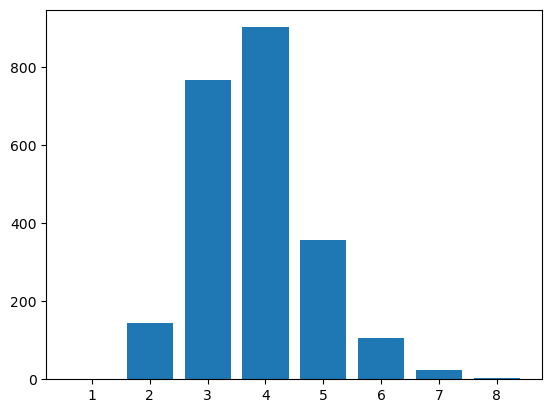

In [114]:
#Create a bar plot to show simulation results
import matplotlib.pyplot as plt
plt.bar(Counter(res).keys(), Counter(res).values())
plt.show()

In [88]:
#Average guesses needed
sum(res)/len(res)

3.825898657427458

In [91]:
#Percentage of games that can solved within 6 tries
1-len([num for num in res if num > 6])/len(res)

0.9878735383282806

# Final Exam Tips

1. Go through all slides and exercises again, make sure you understand everything
2. Redo all assignments, WITHOUT the use of AI (Time it if you can)
3. Prepare your own cheatsheet-like notebook. Focus on those that you are not familiar with / might take a long time to solve.
4. Here is a sample study plan: https://app.eraser.io/workspace/d6Jk1GSF5MjbIPixTE34?origin=share
5. Good luck!